In [5]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = './data'
X_yes = np.load(f'{DATA_PATH}/def_yes_images.npy')
X_no = np.load(f'{DATA_PATH}/def_no_images.npy')
classes = np.load(f'{DATA_PATH}/classes.npy')

print(f'X_yes shape: {X_yes.shape}')
print(f'X_no shape {X_no.shape}')
print(f'classes shape: {classes.shape}')

X_yes shape: (120, 214, 214)
X_no shape (83, 214, 214)
classes shape: (203,)


In [3]:
X = np.row_stack((X_yes, X_no))
N, SIZE_H, SIZE_V = X.shape
X = np.reshape(X, newshape=(N, SIZE_H * SIZE_V))
print(f'X shape: {X.shape}')

X shape: (203, 45796)


In [4]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [30]:
pca = PCA(n_components=None)
X_tmp = pca.fit_transform(X)
n_components = pca.n_components_
variance_cumsum = pca.explained_variance_ratio_.cumsum()
print(f'X_tmp shape: {X_tmp.shape}')
print(f'N_components: {n_components}')
print(f'Porcentaje de varianza acumulada: {variance_cumsum}')

X_tmp shape: (203, 203)
N_components: 203
Porcentaje de varianza acumulada: [0.23374184 0.28687353 0.32665089 0.35852116 0.38788095 0.41429257
 0.43767464 0.45894479 0.47797248 0.49396478 0.5094039  0.5240692
 0.53848409 0.55212627 0.56477001 0.57688524 0.58856858 0.59933917
 0.60977632 0.61941568 0.62874952 0.63769501 0.64660095 0.6551577
 0.66331316 0.67135732 0.6792392  0.68627464 0.69322678 0.69993813
 0.70632296 0.71251622 0.71861433 0.72457708 0.73014987 0.73563319
 0.74101625 0.74624934 0.75141591 0.75645921 0.76135755 0.76609144
 0.77060896 0.77507641 0.77953898 0.78388487 0.78812702 0.79223307
 0.79628023 0.80023691 0.80410312 0.80792312 0.81162644 0.81523983
 0.81876811 0.82224212 0.82568349 0.82900285 0.83228653 0.8355207
 0.83873756 0.84189816 0.84497688 0.84803748 0.85103801 0.85397742
 0.85685966 0.8596635  0.86246114 0.86520115 0.86792479 0.87055391
 0.87314794 0.87571314 0.87819916 0.8806409  0.8830172  0.88537679
 0.887704   0.89001223 0.89228661 0.89450069 0.89667904 

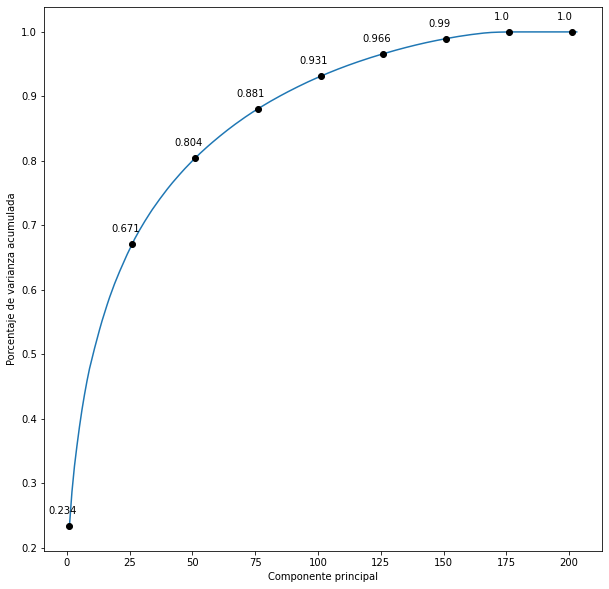

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada')
ax.plot(
    np.arange(1, n_components + 1),
    variance_cumsum,
)
i, aux = 0, 0
for x, y in zip(np.arange(1, n_components + 1, 25), variance_cumsum[:-1:25]):
    ax.plot(x, y, 'ko')
    ax.annotate(
        np.round(y, 3),
        (x, y),
        textcoords='offset points',
        xytext=(-7, 12),
        ha='center'
    )
plt.show()